# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Read DataSet

In [ ]:
df = pd.read_csv("dataframe_.csv")

In [ ]:
df.shape

(1697, 2)

# Describe the Data


In [ ]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Here the maximum value is way bigger than the mean

## Removing the null values and handling the outliers

In [ ]:
df.isnull().sum()

input     1
output    1
dtype: int64

We can see that there are some missing values in **x1** and **x2** feature. So let's impute these missing values.

In [ ]:
df1 = df.fillna(df.median())
df1.isnull().sum()

input     0
output    0
dtype: int64

In [ ]:
df1.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check if thers are any outliers using **boxplots**

e:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

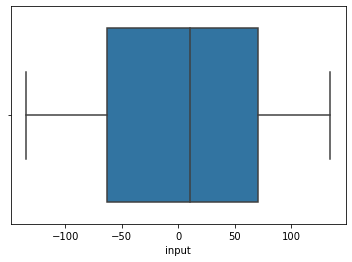

In [ ]:
sns.boxplot(df1['input'])

e:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

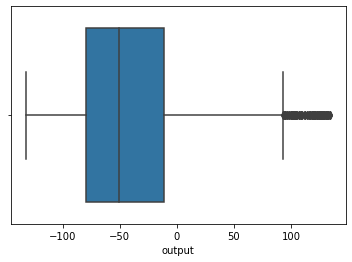

In [ ]:
sns.boxplot(df1['output'])

Here we can see that there are outliers. So let us remove them.

In [ ]:
df1['output'].quantile(0.999)

133.7931158

In [ ]:
df2 = df1[df1['output'] <= 130]

In [ ]:
df2.describe()

,input,output
count,1678.000000,1678.000000
mean,1.528318,-35.977358
std,78.322356,63.691876
min,-134.962839,-132.422167
25%,-62.177903,-80.064621
50%,10.494574,-51.000000
75%,70.021565,-15.000000
max,134.605775,129.434291


Let's check for outliers using boxplots

e:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

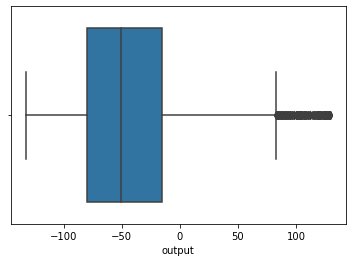

In [ ]:
sns.boxplot(df2['output'])

e:\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

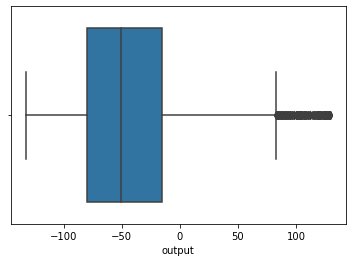

In [ ]:
sns.boxplot(df2['output'])

we can see that there are no outliers in the data set

<AxesSubplot:xlabel='input', ylabel='output'>

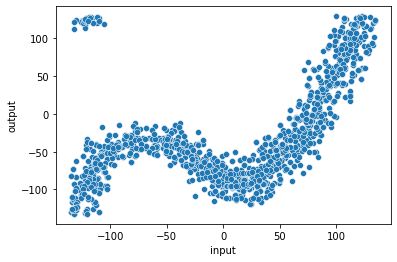

In [ ]:
sns.scatterplot(x=df2['input'], y=df2['output'])

In [ ]:
df2

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


# Data preprocessing for Model training and evaluation

In [ ]:
X = df2.drop(columns=['output'])
y = df2['output']

In [ ]:
y.count

<bound method Series.count of 0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1678, dtype: float64>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [ ]:
y_transformed

array([487, 439, 509, ..., 697, 576, 466], dtype=int64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Logistic Regression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_transformed)
score = lg.score(X_test, y_test)
print(score)
pred = lg.predict(X_test)
print(classification_report(y_test,pred))


In [ ]:
# Support Vector Machines with linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
score1 = svc.score(X_test, y_test)
print(score1)
pred = svc.predict(X_test)
print(classification_report(y_test,pred))

ValueError: Unknown label type: 'continuous'

In [ ]:
# support vector Machines with rbf kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
score2 = svc_rbf.score(X_test, y_test)
print(score2)
pred = svc_rbf.predict(X_test)
print(classification_report(y_test,pred))

0.9442176870748299
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       412
           1       0.98      0.89      0.93       323

    accuracy                           0.94       735
   macro avg       0.95      0.94      0.94       735
weighted avg       0.95      0.94      0.94       735



In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,min_samples_split=30)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)
pred = dt.predict(X_test)
print(classification_report(y_test,pred))

0.9469387755102041
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       412
           1       0.95      0.93      0.94       323

    accuracy                           0.95       735
   macro avg       0.95      0.94      0.95       735
weighted avg       0.95      0.95      0.95       735



In [ ]:
# K Nearest Neighbours

# n_neighbours = 5 gives the best result
knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

0.9537414965986395
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       412
           1       0.96      0.94      0.95       323

    accuracy                           0.95       735
   macro avg       0.95      0.95      0.95       735
weighted avg       0.95      0.95      0.95       735



## Evaluation
- Out of all the Five models, KNN scored the highest.
- Decision Tree and SVC with 'rbf' kernel are close.